In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties import umath

$\textbf{Messung der mittleren und momentanen Geschwindigkeit} \\$
Definitonen der Neigung und das Auslesen der Dateien

Nun nutze den Zusammenhang

$<v>=\sqrt{2aS} \frac{1}{2} \left(\sqrt{1+\frac{D}{2S}} + \sqrt{1-\frac{D}{2S}} \right)$

wobei der Term $\sqrt{2aS}$ der momentanen Geschwindigkeit entspricht.

C:\Users\andri\AppData\Local\Temp\ipykernel_11420\4031512509.py:48: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(a-beta_m)*S.n)*(np.sqrt(1+d2**(1/2)/(2*S.n)) + np.sqrt(1-d2**(1/2)/(2*S.n)))/2


Beschleunigung a: 0.07543488972714636 m/s^2
Beschleunigung a: 7.543488972714636 cm/s^2


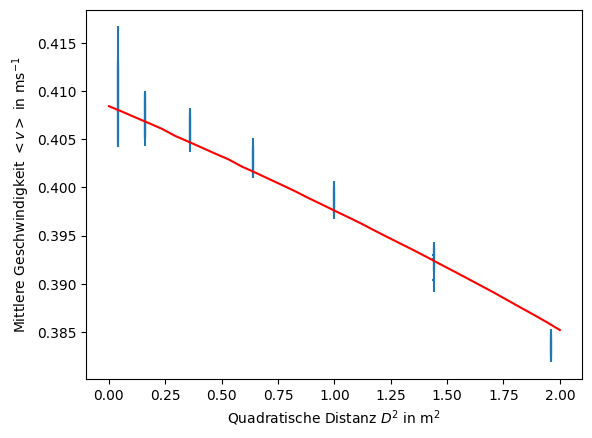

In [147]:
met1_data=pd.read_csv("TwoGatesErdbeschleunigung.csv")

#Distanzen und Zeiten
D=[]
t=met1_data["t/s"]
for i in range(len(met1_data["Nr."])):
    D.append(ufloat(met1_data["D/cm"][i], met1_data["D_err/cm"][i]))
D=np.array(D)/100 #Umwandlung in meter

#Berechnung der mittleren Geschwindigkeit mit Unsicherheit aufgrund der Distanz
v=[]
for i in range(len(met1_data["Nr."])):
    v.append(D[i]/t[i])
v=np.array(v)
v=v#*0.995 #Berücksichtigung der statistischen Erhöhung der Messwerte um 1-2%

#definiere die Neigung, Start-/Mittelposition und die Masse
d=ufloat(9.3375, 0.0395) #Dicke vom Klotz
distance_stands=ufloat(102.4, 0.14)
angle=umath.atan(d/distance_stands)
mass=ufloat(0.296, 0.001) #kg
x0=ufloat(0.015, 0.0014) #Startposition in m
x1=ufloat(1.15, 0.0014) #Mittelposition in m
S=x1-x0 #Abstand zwischen den Positionen

#Definition von D Quadrat aufgrund der folgenden Plots
D2=[]
for i in range(len(D)):
    D2.append(D[i]*D[i])
D2=np.array(D2)

#spezielle Definiton für die Unsicherheit der Geschwindigkeit, dadurch komplette Unsicherheit
v_err=[]
for i in range(len(v)):
    v_err.append(np.sqrt((v[i].s)**2 + 0.001**2 + (3e-3*(v[i].n)**2)**2))
v_err=np.array(v_err)

#Plots    
plt.errorbar([D2[i].n for i in range(len(D2))], [v[i].n for i in range(len(v))],
             yerr=v_err, xerr=[D2[i].s for i in range(len(D2))], fmt="None")
plt.xlabel(r"Quadratische Distanz $D^2$ in m$^2$")
plt.ylabel(r"Mittlere Geschwindigkeit $<v>$ in ms$^{-1}$")

#Fitten
from scipy.optimize import curve_fit
beta_m=1.5/296*np.array([v[i].n for i in range(len(v))]) #Berücksichtigung der Reibung
def Function1(d2, a):
    return np.sqrt(2*(a-beta_m)*S.n)*(np.sqrt(1+d2**(1/2)/(2*S.n)) + np.sqrt(1-d2**(1/2)/(2*S.n)))/2

popt, pcov = curve_fit(Function1, [D2[i].n for i in range(len(D2))], [v[i].n for i in range(len(v))], sigma=v_err)
a = popt[0]
print("Beschleunigung a: " + str(a) + " m/s^2")
print("Beschleunigung a: " + str(a*100) + " cm/s^2")
#Sehr gute Übereinstimmung unter annahme der Kleinwinkelnäherung
plt.plot(np.linspace(0, 2, 35), Function1(np.linspace(0, 2, 35), a), color="red")

plt.show()

$\textbf{Alternative Methode zur Messung der Beschleunigung} \\$
Wir messen die Geschwindigkeit an zwei verschiedenen Orten durch Verwendung des Collision Modes.

$a=\frac{v_1^2-v_2^2}{2(x_1-x_2)}$


In [148]:
met2_data=pd.read_csv("AltMethod_Speed+Collision.csv")
factor=1
distance=ufloat(0.2, 0.002) #m
v1=[]
for  i in range(10):
    v1.append(ufloat(met2_data["v1/cm/s"][i]*factor, np.sqrt(0.001**2+(met2_data["v1/cm/s"][i]*factor)**2*3e-3)))
v1=np.array(v1)/100 #m/s
v2=[]
for  i in range(10):
    v2.append(ufloat(met2_data["v2/cm/s"][i]*factor, np.sqrt(0.001**2+(met2_data["v2/cm/s"][i]*factor)**2*3e-3)))
v2=np.array(v2)/100 #m/s
a=(v1**2-v2**2)/(2*d) #m/s^2
a*100

array([-0.1899009370816601+/-0.09813426705625765,
       -0.2011512717536814+/-0.0986143054302934,
       -0.18934404283801867+/-0.0975692657837251,
       -0.18934404283801867+/-0.0975692657837251,
       -0.1899009370816601+/-0.09813426705625765,
       -0.19778313253012045+/-0.09883102209067098,
       -0.1899009370816601+/-0.09813426705625765,
       -0.1899009370816601+/-0.09813426705625765,
       -0.1899009370816601+/-0.09813426705625765,
       -0.1944042838018742+/-0.09904933441625377], dtype=object)